In [1]:
include("state_utils.jl")

load_patients (generic function with 1 method)

In [2]:
# Single patient file
p1 = JSON.parsefile(dpath * "patient_2.json")

Dict{String,Any} with 8 entries:
  "num_observations" => 74
  "mortality"        => true
  "patient_index"    => 2
  "actions"          => Any[24, 24, 24, 24, 24, 14, 14, 4, 4, 4  …  2, 2, 2, 2,…
  "icuid"            => 200033
  "MAP"              => Any[103, 106, 79, 106, 101, 111, 100, 97, 101, 107  …  …
  "cont_actions"     => Any[Any[0.3375, 0.45, 0.225, 0.225, 0.3945, 0.113, 0.11…
  "trajectory"       => Any[Any[-0.359482, 0.0555777, 0.132761, -0.345521, -0.6…

In [3]:
# Trajectory state size
size(p1["trajectory"][1])

(49,)

0.8372723020171369

In [2]:
# State matrix, columns are 49-vectors of states
S = load_states()
size(S)

(49, 352328)

In [14]:
S = shuffle_cols(S);

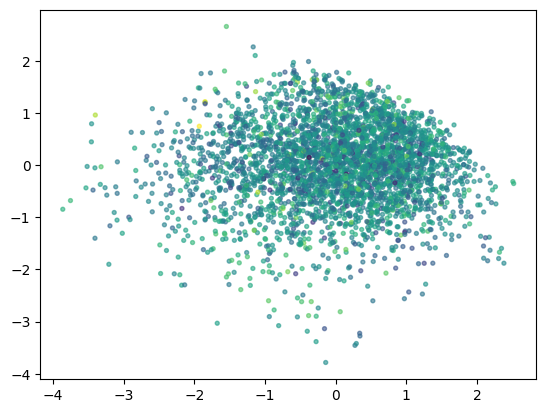

In [15]:
M = create_pca_matrix(S, at = 0.998, dims = 3)
_, srs = partition_dataset(S, at = 0.99)
    
# apply PCA model to testing set
y_te = reduce_dims(M, srs)

# reconstruct testing observations (approximately)
# test_2d = reconstruct(M, y_te)

scatter(y_te[1,:],y_te[2,:], c = y_te[3,:], s = 8, alpha = 0.6)
plt.show()

In [17]:
_, opt = partition_dataset(S, at = 0.95)
size(opt)

(49, 17617)

In [18]:
# initialize centroid for kmean
centroids = k_means_pp(opt, n_states)
size(centroids)

k_means_pp 1 of 750
k_means_pp 11 of 750
k_means_pp 21 of 750
k_means_pp 31 of 750
k_means_pp 41 of 750
k_means_pp 51 of 750
k_means_pp 61 of 750
k_means_pp 71 of 750
k_means_pp 81 of 750
k_means_pp 91 of 750
k_means_pp 101 of 750
k_means_pp 111 of 750
k_means_pp 121 of 750
k_means_pp 131 of 750
k_means_pp 141 of 750
k_means_pp 151 of 750
k_means_pp 161 of 750
k_means_pp 171 of 750
k_means_pp 181 of 750
k_means_pp 191 of 750
k_means_pp 201 of 750
k_means_pp 211 of 750
k_means_pp 221 of 750
k_means_pp 231 of 750
k_means_pp 241 of 750
k_means_pp 251 of 750
k_means_pp 261 of 750
k_means_pp 271 of 750
k_means_pp 281 of 750
k_means_pp 291 of 750
k_means_pp 301 of 750
k_means_pp 311 of 750
k_means_pp 321 of 750
k_means_pp 331 of 750
k_means_pp 341 of 750
k_means_pp 351 of 750
k_means_pp 361 of 750
k_means_pp 371 of 750
k_means_pp 381 of 750
k_means_pp 391 of 750
k_means_pp 401 of 750
k_means_pp 411 of 750
k_means_pp 421 of 750
k_means_pp 431 of 750
k_means_pp 441 of 750
k_means_pp 451 of 750

750-element Array{Any,1}:
 [0.4443686888037049, -0.9019472232522644, 0.13276113576479812, 0.2665256292882457, -0.054899703952222705, 0.22380352251453486, -0.40594725951727817, 0.11348676821499683, -0.3460832220796996, 0.30694928142042055  …  0.47374923877199493, 0.06104514473873385, 0.062351339396293025, 0.06281410999971239, -0.2348541643176924, -0.23448868318727206, -0.23405595822849506, -0.5739796527035204, -0.5673479191956103, -0.5610630356772686]
 [-0.3594817139279269, 0.22787494116817297, -0.04272632167496841, 0.5534718491906789, 0.770681736489321, 0.27038995811306105, 0.3831596505555297, 0.8372723020171369, -1.4747512178850977, -1.7293791180070937  …  0.797779939569774, -1.7210430846030746, -1.6811883310808462, -1.6919473699247065, -0.2348541643176924, -0.23448868318727206, -0.23405595822849506, -0.15117872872166363, -0.14737047925139493, 0.6076302453081667]
 [0.4443686888037049, -0.3280605744941749, -0.04272632167496841, 0.09376509297820271, -0.3532708646467797, 0.13063065131748

In [19]:
# now we call standard k-means
m_centroids = hcat(centroids...)
R           = kmeans!(S, m_centroids)
size(R)

KmeansResult{Array{Float64,2},Float64,Int64}([0.40621985613169675 -0.359481713927927 … 0.2993490820982393 -0.07448020750489384; -0.40345664640022083 0.22787494116817278 … -0.2958155213195524 0.08958532518537078; … ; -0.4244876935348047 -0.01930841084609473 … -0.05553950678994245 0.21657309276032036; -0.4166206907635008 -0.02358731817135222 … -0.04287631992361684 0.20998918145265774], [134, 556, 19, 181, 649, 417, 243, 749, 670, 741  …  731, 181, 696, 488, 464, 604, 471, 139, 540, 489], [4.159561425053591, 3.0680754539587474, 5.083579572530066, 4.734432103828373, 4.336154760297919, 5.6943043085768865, 3.3628639888079097, 2.7281702701452932, 5.8425559442540145, 3.2587980132621013  …  3.4133624816646684, 3.3715771623512745, 4.999342585351001, 2.825113073725147, 9.996984743919693, 6.230486043056317, 8.288148285477565, 8.141095188888738, 4.371350007638453, 1.653865152631532], [590, 48, 36, 69, 490, 4, 43, 19, 21, 113  …  396, 531, 725, 415, 519, 635, 161, 671, 836, 330], [590, 48, 36, 69, 4

In [20]:
#
# create matrix for dimentionality reduction from 49 to 2 dimentions
# so that we can visualize our centroids
#
M = create_pca_matrix(S, at = 0.5, dims = 2);

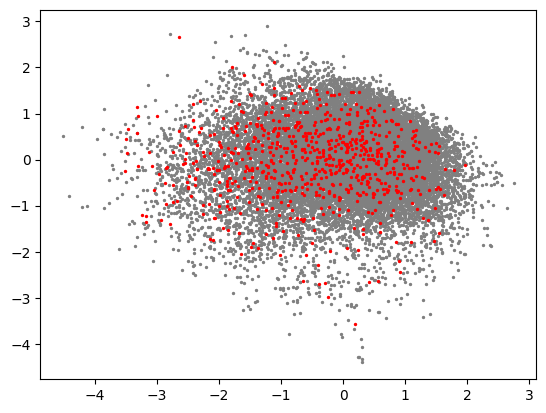

In [21]:
points     = reduce_dims(M, opt)
clusters2d = reduce_dims(M, m_centroids)

scatter(points[1,:], points[2,:], color = "gray", s = 2)
scatter(clusters2d[1,:], clusters2d[2,:], color = "red", s = 2)
plt.show()

In [22]:
state_vectors_file = apath * "state_vectors.json" 
save_state_vectors(state_vectors_file, m_centroids)

In [23]:
lvc = restore_state_vectors(state_vectors_file)

49×750 Array{Float64,2}:
  0.40622    -0.359482    0.355052    0.421069  …   0.299349     -0.0744802
 -0.403457    0.227875    0.135838   -0.337671     -0.295816      0.0895853
  0.057937   -0.0427263  -0.0962289   0.424601      0.254819      0.189519
  0.323062    0.553472   -0.39423     0.918227      0.206701      0.421109
  0.262369    0.770682   -0.353434    0.967542      0.14065       0.475746
  0.387567    0.27039    -0.223944    1.01172   …   0.341578      0.267425
  0.0540531   0.38316    -0.452211    0.706943      0.010038      0.476519
 -0.0318675   0.837272   -0.236756   -0.310497      0.180282      0.445651
  0.0200429  -1.47475     0.4939      0.500315     -0.122612      0.233625
  0.066215   -1.72938    -0.169337    0.17992      -0.000744307  -0.115629
  0.166773   -1.86715    -0.466514   -0.228327  …   0.13         -0.171712
  0.0883901  -1.03962     0.480752    0.390763      0.0648888     0.127738
 -0.0419525   2.38272     1.47009     0.687139      0.0411181     0.15320

In [24]:
# after save-restore matrices should be the same
m_centroids == lvc

true